#Manipulador de 2 grados rotacionales RR

Recordar el manipulador descrito

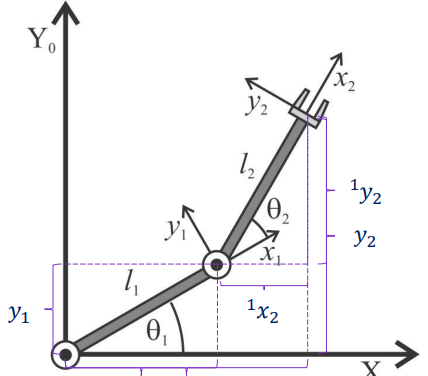

La coordenadas del efector final se pueden determinar empleando geometría y están descrita por las ecuaciones

$\left [  \begin{matrix}
 x_2 \\ y_2
\end{matrix} \right ]=
\left [ \begin{matrix}
l_1 cos(\theta_1)+l_2 cos(\theta_1+\theta_2) \\ l_1 sin(\theta_1) + l_2 sin(\theta_1 + \theta_2)
\end{matrix}
\right ]$

Observar que estas ecuaciones describen un proceso de traslación en los ejes $X$ y $Y$ respectivamente. De forma adicional, el sistema de referencia del efector final presenta una rotación en el eje $Z$ con valor de $\theta_1 + \theta_2$

El proceso completo de cinemática directa se puede realizar empleando ecuaciones de transformación homogenea como se muestra a continuación

##1. Análisis simbólico

Para esté análisis se emplea la librería [sympy](https://www.sympy.org/en/index.html), la cual nos permitirá determinar las matrices de transformación homogeneas para cada eslabon así como su producto.

In [1]:
import sympy as sp     # Se importa la biblioteca para el cálculo simbólico

In [8]:
# =============================================================================
# Se definen funciones para representar transformaciones de traslación pura y
# rotación pura al rededor del eje Z
# =============================================================================
def transformacion_traslacion(x: sp.symbols, y: sp.symbols, z: sp.symbols) -> sp.Matrix:
    """
    Retorna una representación simbólica de la transformación homogénea
    de traslación pura

    Parametros (sp.symbols):
      x: translación en la dirección x
      y: translación en la dirección y
      z: translación en la dirección z
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def transformacion_rotacion_z(ang: sp.symbols) -> sp.Matrix:
    """
    Retorna una representación simbólica de la transformación homogénea
    de rotación pura alrededor de z

    Parametros (sp.symbols):
      ang: ángulo de rotación alrededor del eje z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T


In [14]:
# Definición de variables representativas de la geometría del manipulador
q1, q2, l1, l2 = sp.symbols("q1 q2 l1 l2")

# Se definen las matrices de transformacion homogenea correspondientes empleando
# la notación:
#    Tab: Transformación del sistema 'b' con respecto al sistema 'a'

# Se definen la transformación del sistema 1 (codo) respecto al sistema 0 (base del robot)
T01 = transformacion_rotacion_z(q1)*transformacion_traslacion(l1,0,0)
# Se definen la transformación del sistema 2 (efector final) respecto al sistema 1 (codo)
T12 = transformacion_rotacion_z(q2)*transformacion_traslacion(l2,0,0)
# Se definen la transformación del sistema 2 (efector final) respecto al sistema 0 (base del robot)
T02 = sp.simplify(T01*T12)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T02:"); display(T02)

T01:


Matrix([
[cos(q1), -sin(q1), 0, l1*cos(q1)],
[sin(q1),  cos(q1), 0, l1*sin(q1)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

T12:


Matrix([
[cos(q2), -sin(q2), 0, l2*cos(q2)],
[sin(q2),  cos(q2), 0, l2*sin(q2)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

T02:


Matrix([
[cos(q1 + q2), -sin(q1 + q2), 0, l1*cos(q1) + l2*cos(q1 + q2)],
[sin(q1 + q2),  cos(q1 + q2), 0, l1*sin(q1) + l2*sin(q1 + q2)],
[           0,             0, 1,                            0],
[           0,             0, 0,                            1]])

Analizando la forma de la matriz $^0T_ 2$ se puede claramente observar:
* Traslación en los ejes $X$ y $Y$
* Rotación en el eje $Z$ con valor de $\theta_1 + \theta_2$

## Cálculo numérico

El mismo procedimiento se puede realizar de forma numérica empleando numpy para el manejo de matrices y vectores en python

In [15]:
import numpy as np

In [29]:
# =============================================================================
# Se definen funciones para calcular las matrices de transformacio de traslación
# pura y rotación pura al rededor del eje Z
# =============================================================================
def transformacion_traslacion_num(x: float, y: float, z: float) -> np.ndarray:
    """
    Retorna una representación numérica de la transformación homogénea
    de traslación pura

    Parametros (float):
      x: translación en la dirección x
      y: translación en la dirección y
      z: translación en la dirección z
    """
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, y],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T

def transformacion_rotacion_z_num(ang: float) -> np.ndarray:
    """
    Retorna una representación numérica de la transformación homogénea
    de rotación pura alrededor de z

    Parametros (float):
      ang: ángulo de rotación alrededor del eje z
    """
    T = np.array([[np.cos(ang), -np.sin(ang), 0, 0],
                  [np.sin(ang), np.cos(ang), 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


In [30]:
# =============================================================================
# Se define la función para calcular la cinemática directa del manipulador de
# 2 grados de libertad RR
# =============================================================================
def cinematica_directa_robot2D(q1: float, q2: float, l1: float, l2: float):
  """
  Calcula la cinemática directa del robot 2D

  Parámetros (float):
      q1: Ángulo de la articulación 1 en radianes.
      q2: Ángulo de la articulación 2 en radianes.
      l1: Longitud del eslabón 1.
      l2: Longitud del eslabón 2.

  Retorna:
      Una tupla de matriz 4x4 que representan las transformaciones homogénea de
      cada eslabon con respecto a la base del robot.
  """
  T01 = transformacion_rotacion_z_num(q1) @ transformacion_traslacion_num(l1, 0, 0)
  T12 = transformacion_rotacion_z_num(q2) @ transformacion_traslacion_num(l2, 0, 0)
  T02 = T01 @ T12
  return T01, T02


In [39]:
from ipywidgets import interact

# Ejemplo de cálculo de la cinemática directa
@interact(q1=(0, 360, 1), q2=(0, 360, 1), l1=(0, 10, 1), l2=(0, 10, 1))
def cinematica_directa_interactivo(q1, q2, l1, l2):
  # Aplicación de cinemática directa numérica
  T01, T02 = cinematica_directa_robot2D(np.deg2rad(q1), np.deg2rad(q2), l1, l2)

  # Mostrar el resultado
  print(np.round(T02,3))

interactive(children=(IntSlider(value=180, description='q1', max=360), IntSlider(value=180, description='q2', …

In [ ]:
!pip install visual_kinematics